In [4]:
!git clone https://github.com/rhendz/pytorch-CycleGAN-and-pix2pix.git

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2479, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 2479 (delta 11), reused 20 (delta 7), pack-reused 2451
Receiving objects: 100% (2479/2479), 8.21 MiB | 12.87 MiB/s, done.
Resolving deltas: 100% (1548/1548), done.


In [5]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [6]:
print(os.getcwd())
!git pull

/content/pytorch-CycleGAN-and-pix2pix/pytorch-CycleGAN-and-pix2pix
Already up to date.


In [7]:
!bash ./datasets/download_cyclegan_dataset.sh apple2orange

Specified [apple2orange]
for details.

--2022-05-14 23:56:16--  http://efrosgans.eecs.berkeley.edu/cyclegan/datasets/apple2orange.zip
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78456409 (75M) [application/zip]
Saving to: ‘./datasets/apple2orange.zip’

./datasets/apple2or 100%[===================>]  74.82M  5.01MB/s    in 23s     

2022-05-14 23:56:39 (3.25 MB/s) - ‘./datasets/apple2orange.zip’ saved [78456409/78456409]

Archive:  ./datasets/apple2orange.zip
   creating: ./datasets/apple2orange/trainA/
  inflating: ./datasets/apple2orange/trainA/n07740461_6908.jpg  
  inflating: ./datasets/apple2orange/trainA/n07740461_7635.jpg  
  inflating: ./datasets/apple2orange/trainA/n07740461_586.jpg  
  inflating: ./datasets/apple2orange/trainA/n07740461_9813.jpg  
  inflating: ./datasets/apple2o

In [8]:
!pip install -r requirements.txt
!pip install torchinfo

import matplotlib.pyplot as plt # plotting library
import numpy as np # this module is useful to work with numerical arrays
import pandas as pd 
import random 
import torch
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader,random_split
from torch import nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm
import functools
from torchinfo import summary

In [88]:
import time
from options.train_options import TrainOptions
from data import create_dataset
from models import create_model
from util.visualizer import Visualizer
from argparse import Namespace

opt = Namespace(batch_size=1, beta1=0.5, checkpoints_dir='./checkpoints', continue_train=False, crop_size=28, 
               dataroot='./datasets/apple2orange_resized_64', dataset_mode='unaligned', direction='AtoB', 
               display_env='main', display_freq=400, display_id=1, display_ncols=4, display_port=8097, 
               display_server='http://localhost', display_winsize=28, epoch='latest', epoch_count=1, 
               gan_mode='lsgan', gpu_ids='0', init_gain=0.02, init_type='normal', input_nc=1, lambda_A=10.0, lambda_B=10.0, 
               lambda_identity=0.5, load_iter=0, load_size=28, lr=0.0002, lr_decay_iters=50, lr_policy='linear', 
               max_dataset_size=np.inf, model='cycle_gan', n_epochs=100, n_epochs_decay=100, n_layers_D=3, 
               name='apple2orange', ndf=64, netD='basic', netG='resnet_3blocks', ngf=64, no_dropout=True, 
               no_flip=False, no_html=False, norm='instance', num_threads=4, output_nc=1, phase='train', 
               pool_size=50, preprocess='resize_and_crop', print_freq=100, save_by_iter=False, 
               save_epoch_freq=5, save_latest_freq=5000, serial_batches=False, suffix='', 
               update_html_freq=1000, use_wandb=False, verbose=False)

train_loader = create_dataset(opt)
# print(len(train))
opt.phase='test'
test_loader = create_dataset(opt)
# print(len(test))
# m = len(dataset)

# for i_batch, sample_batched in enumerate(dataset):
#   print(sample_batched)

dataset [UnalignedDataset] was created
dataset [UnalignedDataset] was created


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:333: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [43]:
for data in train_loader:
  print(data['A'].size())

torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
torch.Size([4, 3, 64, 64])
t

In [94]:
data_dir = 'dataset'

train_dataset = torchvision.datasets.MNIST(data_dir, train=True, download=True)
test_dataset  = torchvision.datasets.MNIST(data_dir, train=False, download=True)

print(train_dataset)

train_transform = transforms.Compose([
transforms.ToTensor(),
])

test_transform = transforms.Compose([
transforms.ToTensor(),
])

train_dataset.transform = train_transform
test_dataset.transform = test_transform

m=len(train_dataset)

train_data, val_data = random_split(train_dataset, [int(m-m*0.2), int(m*0.2)])
batch_size=32

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size)
valid_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,shuffle=True)

Dataset MNIST
    Number of datapoints: 60000
    Root location: dataset
    Split: Train


In [90]:
from models.networks import *

shp = 3
mnist_padding = 1

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Selected device: {device}')

class VariationalEncoder(nn.Module):
    def __init__(self, latent_dims):  
        super(VariationalEncoder, self).__init__()
        nc = 1 # num channels
        self.conv1 = nn.Conv2d(nc, 8, 3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(8, 16, 3, stride=2, padding=1)
        self.batch2 = nn.BatchNorm2d(16)
        self.conv3 = nn.Conv2d(16, 32, 3, stride=2, padding=0)  
        self.linear1 = nn.Linear(32*shp*shp, 128)
        self.linear2 = nn.Linear(128, latent_dims)
        self.linear3 = nn.Linear(128, latent_dims)

        self.N = torch.distributions.Normal(0, 1)
        self.N.loc = self.N.loc.cuda() # hack to get sampling on the GPU
        self.N.scale = self.N.scale.cuda()
        self.kl = 0

    def forward(self, x):
        x = x.to(device)
        x = F.relu(self.conv1(x))
        x = F.relu(self.batch2(self.conv2(x)))
        x = F.relu(self.conv3(x))
        # print(x.shape)
        x = torch.flatten(x, start_dim=1)
        x = F.relu(self.linear1(x))
        mu =  self.linear2(x)
        sigma = torch.exp(self.linear3(x))
        z = mu + sigma*self.N.sample(mu.shape)
        self.kl = (sigma**2 + mu**2 - torch.log(sigma) - 1/2).sum()
        return z

class Decoder(nn.Module):
    
    def __init__(self, latent_dims):
        super().__init__()

        self.decoder_lin = nn.Sequential(
            nn.Linear(latent_dims, 128),
            nn.ReLU(True),
            nn.Linear(128, shp * shp * 32),
            nn.ReLU(True)
        )

        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, 3, 3))

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=1, output_padding=1)
        )
        
    def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = torch.sigmoid(x)
        return x

# Serv
class Decoder2(nn.Module):
  def __init__(self, latent_dims):
        super().__init__()

        self.decoder_lin = nn.Sequential(
            nn.Linear(latent_dims, 128),
            nn.ReLU(True),
            nn.Linear(128, shp * shp * 32),
            nn.ReLU(True)
        )

        self.unflatten = nn.Unflatten(dim=1, unflattened_size=(32, shp, shp))

        self.decoder_conv = nn.Sequential(
            nn.ConvTranspose2d(32, 16, 3, stride=2, output_padding=0),
            nn.BatchNorm2d(16),
            nn.ReLU(True),
            nn.ConvTranspose2d(16, 8, 3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(8),
            nn.ReLU(True),
            nn.ConvTranspose2d(8, 1, 3, stride=2, padding=mnist_padding, output_padding=1)
        )

        self.generator = define_G(opt.input_nc, opt.output_nc, opt.ngf, opt.netG, opt.norm, not opt.no_dropout, opt.init_type, opt.init_gain)

  def forward(self, x):
        x = self.decoder_lin(x)
        x = self.unflatten(x)
        x = self.decoder_conv(x)
        x = self.generator(x)
        x = torch.sigmoid(x)
        return x

class VariationalAutoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(VariationalAutoencoder, self).__init__()
        self.encoder = VariationalEncoder(latent_dims)
        self.decoder = Decoder2(latent_dims)

    def forward(self, x):
        x = x.to(device)
        z = self.encoder(x)
        return self.decoder(z)

# ### Training function
# def train_epoch(vae, device, dataloader, optimizer):
#     # Set train mode for both the encoder and the decoder
#     vae.train()
#     train_loss = 0.0
#     # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
#     for x in dataloader: 
#         # print(x)
#         # Move tensor to the proper device
#         x['A'] = x['A'].to(device)
#         x_hat = vae(x['A'])
#         # Evaluate loss
#         loss = ((x['A'] - x_hat)**2).sum() + vae.encoder.kl

#         # Backward pass
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         # Print batch loss
#         # print('\t partial train loss (single batch): %f' % (loss.item()))
#         train_loss+=loss.item()

#     return train_loss / len(dataloader.dataset)

# ### Testing function
# def test_epoch(vae, device, dataloader):
#     # Set evaluation mode for encoder and decoder
#     vae.eval()
#     val_loss = 0.0
#     with torch.no_grad(): # No need to track the gradients
#         for x in dataloader:
#             # Move tensor to the proper device
#             x['A'] = x['A'].to(device)
#             # Encode data
#             encoded_data = vae.encoder(x['A'])
#             # Decode data
#             x_hat = vae(x['A'])
#             loss = ((x['A'] - x_hat)**2).sum() + vae.encoder.kl
#             val_loss += loss.item()

#     return val_loss / len(dataloader.dataset)

### Training function
def train_epoch(vae, device, dataloader, optimizer):
    # Set train mode for both the encoder and the decoder
    vae.train()
    train_loss = 0.0
    # Iterate the dataloader (we do not need the label values, this is unsupervised learning)
    for x, _ in dataloader: 
        # print(x)
        # Move tensor to the proper device
        x = x.to(device)
        x_hat = vae(x)
        # Evaluate loss
        loss = ((x - x_hat)**2).sum() + vae.encoder.kl

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Print batch loss
        # print('\t partial train loss (single batch): %f' % (loss.item()))
        train_loss+=loss.item()

    return train_loss / len(dataloader.dataset)

### Testing function
def test_epoch(vae, device, dataloader):
    # Set evaluation mode for encoder and decoder
    vae.eval()
    val_loss = 0.0
    with torch.no_grad(): # No need to track the gradients
        for x, _ in dataloader:
            # Move tensor to the proper device
            x = x.to(device)
            # Encode data
            encoded_data = vae.encoder(x)
            # Decode data
            x_hat = vae(x)
            loss = ((x - x_hat)**2).sum() + vae.encoder.kl
            val_loss += loss.item()

    return val_loss / len(dataloader.dataset)

# enc = VariationalEncoder(4)
# summary(enc, input_size=(256,1,32,32))

# dec = Decoder2(4)
# summary(dec, input_size=(256,4))

vae = VariationalAutoencoder(16)
summary(vae, input_size=(8,1,28,28))

Selected device: cuda
initialize network with normal


Layer (type:depth-idx)                                  Output Shape              Param #
VariationalAutoencoder                                  --                        --
├─VariationalEncoder: 1-1                               [8, 16]                   --
│    └─Conv2d: 2-1                                      [8, 8, 14, 14]            80
│    └─Conv2d: 2-2                                      [8, 16, 7, 7]             1,168
│    └─BatchNorm2d: 2-3                                 [8, 16, 7, 7]             32
│    └─Conv2d: 2-4                                      [8, 32, 3, 3]             4,640
│    └─Linear: 2-5                                      [8, 128]                  36,992
│    └─Linear: 2-6                                      [8, 16]                   2,064
│    └─Linear: 2-7                                      [8, 16]                   2,064
├─Decoder2: 1-2                                         [8, 1, 28, 28]            --
│    └─Sequential: 2-8                      

In [47]:
def plot_ae_outputs(encoder,decoder,n=10):
    plt.figure(figsize=(16,4.5))
    targets = test_dataset.targets.numpy()
    t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
    for i in range(n):
      ax = plt.subplot(2,n,i+1)
      img = test_dataset[t_idx[i]][0].unsqueeze(0).to(device)
      encoder.eval()
      decoder.eval()
      with torch.no_grad():
         rec_img  = decoder(encoder(img))
      plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()  

In [91]:
### Set the random seed for reproducible results
torch.manual_seed(0)

d = 4

vae = VariationalAutoencoder(latent_dims=d)

lr = 1e-3 

optim = torch.optim.Adam(vae.parameters(), lr=lr, weight_decay=1e-5)

vae.to(device)

initialize network with normal


VariationalAutoencoder(
  (encoder): VariationalEncoder(
    (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (batch2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2))
    (linear1): Linear(in_features=288, out_features=128, bias=True)
    (linear2): Linear(in_features=128, out_features=4, bias=True)
    (linear3): Linear(in_features=128, out_features=4, bias=True)
  )
  (decoder): Decoder2(
    (decoder_lin): Sequential(
      (0): Linear(in_features=4, out_features=128, bias=True)
      (1): ReLU(inplace=True)
      (2): Linear(in_features=128, out_features=288, bias=True)
      (3): ReLU(inplace=True)
    )
    (unflatten): Unflatten(dim=1, unflattened_size=(32, 3, 3))
    (decoder_conv): Sequential(
      (0): ConvTranspose2d(32, 16, kernel_size=(3, 3), stride=(2, 2))
      (1): Batch

In [92]:
# def plot_vae_image(encoder, decoder):
#     for data in train_loader:

#       real_img = data['A'][0]
#       plt.imshow(real_img.permute(1, 2, 0))
#       plt.show()
#       gen_img = decoder(encoder(data['A']))
#       # print(gen_img[0].cpu().size())
#       plt.imshow(gen_img[0].cpu().permute(1, 2, 0).detach().numpy())
#       plt.show()
#       break;

def plot_ae_outputs(encoder,decoder,n=10):
    plt.figure(figsize=(16,4.5))
    targets = test_dataset.targets.numpy()
    t_idx = {i:np.where(targets==i)[0][0] for i in range(n)}
    for i in range(n):
      ax = plt.subplot(2,n,i+1)
      img = test_dataset[t_idx[i]][0].unsqueeze(0).to(device)
      encoder.eval()
      decoder.eval()
      with torch.no_grad():
         rec_img  = decoder(encoder(img))
      plt.imshow(img.cpu().squeeze().numpy(), cmap='gist_gray')
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
        ax.set_title('Original images')
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(rec_img.cpu().squeeze().numpy(), cmap='gist_gray')  
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)  
      if i == n//2:
         ax.set_title('Reconstructed images')
    plt.show()  


 EPOCH 1/100 	 train loss 81.012 	 val loss 77.635


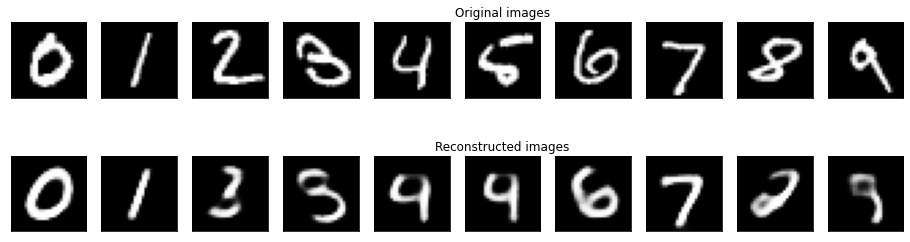


 EPOCH 2/100 	 train loss 76.986 	 val loss 76.370


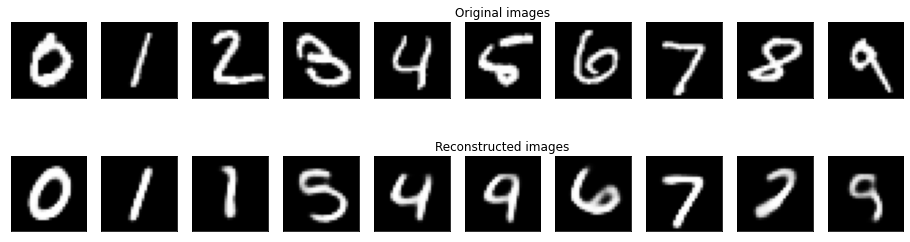


 EPOCH 3/100 	 train loss 76.325 	 val loss 75.964


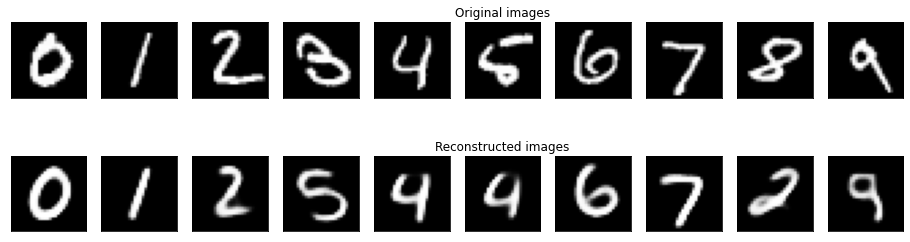


 EPOCH 4/100 	 train loss 75.906 	 val loss 75.878


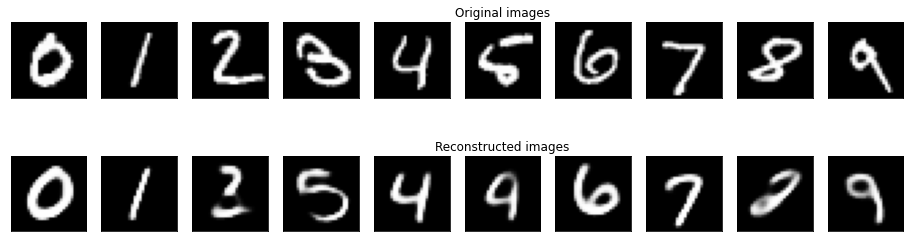


 EPOCH 5/100 	 train loss 75.618 	 val loss 75.580


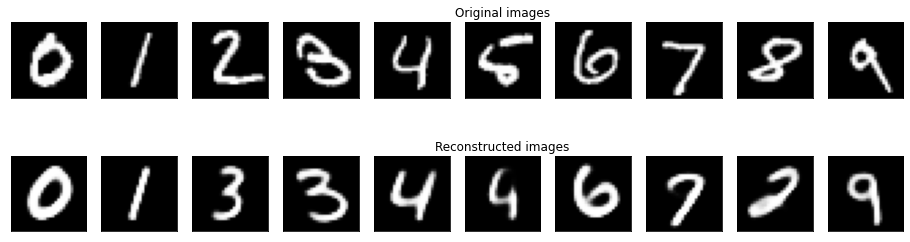

In [ ]:
# vae.decoder.load_state_dict(torch.load('models/vae-decoder-model.pt'))
num_epochs = 100

# Toggle this if not using MNIST
# valid_loader = test_loader

vae_encoder = 0
vae_decoder = 0

for epoch in range(num_epochs):
  train_loss = train_epoch(vae,device,train_loader,optim)
  val_loss = test_epoch(vae,device,valid_loader)
  print('\n EPOCH {}/{} \t train loss {:.3f} \t val loss {:.3f}'.format(epoch + 1, num_epochs,train_loss,val_loss))
  # vae_encoder = vae.encoder
  # vae_decoder = vae.decoder
  plot_ae_outputs(vae.encoder,vae.decoder,n=10)

In [41]:
from PIL import Image
from numpy import asarray
import os

print(os.getcwd())

def resize_images(directory):
    dataset_name = directory.split("/")[-1]
    images = []
    for filename in os.listdir(directory):
        f = os.path.join(directory, filename)
        real_fn = f.replace('\\', '/')
        image = Image.open(real_fn)
        # plt.imshow(image)
        # plt.show()
        data = asarray(image)
        images.append(data)
        newsize = (64, 64)
        image = image.resize(newsize)
        # plt.imshow(image)
        # plt.show()
        image.save('./datasets/apple2orange_resized_64/'+dataset_name+'/'+filename)
    
    #return np.array(images)
resize_images("./datasets/apple2orange/testA")
resize_images("./datasets/apple2orange/testB")
resize_images("./datasets/apple2orange/trainA")
resize_images("./datasets/apple2orange/trainB")

/content/pytorch-CycleGAN-and-pix2pix


In [ ]:
torch.save(vae.state_dict(), 'models/vae-model.pt')
# torch.save(vae.decoder.state_dict(), 'models/vae-decoder-model.pt')

In [ ]:
def show_image(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


vae.eval()

latent = torch.randn(128, d, device=device)
img_recon = vae.decoder(latent)
img_recon = img_recon.cpu()

npimg = img_recon.numpy()
plt.imshow(npimg)
plt.show()

# with torch.no_grad():

#     # sample latent vectors from the normal distribution
#     latent = torch.randn(128, d, device=device)

#     # reconstruct images from the latent vectors
#     img_recon = vae.decoder(latent)
#     img_recon = img_recon.cpu()

#     fig, ax = plt.subplots(figsize=(20, 8.5))
#     show_image(torchvision.utils.make_grid(img_recon.data[:100],10,5))
#     plt.show()

RuntimeError: ignored

In [ ]:
encoded_samples = []
for sample in tqdm.tqdm(test_dataset):
    img = sample[0].unsqueeze(0).to(device)
    label = sample[1]
    # Encode image
    vae.eval()
    with torch.no_grad():
        encoded_img  = vae.encoder(img)
    # Append to list
    encoded_img = encoded_img.flatten().cpu().numpy()
    encoded_sample = {f"Enc. Variable {i}": enc for i, enc in enumerate(encoded_img)}
    encoded_sample['label'] = label
    encoded_samples.append(encoded_sample)
    
encoded_samples = pd.DataFrame(encoded_samples)
encoded_samples


from sklearn.manifold import TSNE
import plotly.express as px

px.scatter(encoded_samples, x='Enc. Variable 0', y='Enc. Variable 1', color=encoded_samples.label.astype(str), opacity=0.7)

100%|██████████| 10000/10000 [00:11<00:00, 899.08it/s]


In [ ]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(encoded_samples.drop(['label'],axis=1))

fig = px.scatter(tsne_results, x=0, y=1, color=encoded_samples.label.astype(str),labels={'0': 'tsne-2d-one', '1': 'tsne-2d-two'})
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.

